# Random Forest
### aka, a lot of random trees

![forest](img/forest.jpeg)

## Outcomes

- differentiate between decision trees and random forest 
- explain what makes random forest so hella cool
- explore the fine-tuning options in `sklearn` for random forest
- build a random forest in `sklearn`


### Scenario: 
We've made a decision tree, but we are concerned it might not generalize well. What to do?


### Could use k-fold cross validation

![dectree](img/decisiontree.png)

### But with same data, might get same results
![same](img/sameresult.png)

### It's like crowd sourcing. 
Could ask a lot of **_similar_** people
![min](img/minions.gif)

Or could ask a more _**diverse**_ group of people
![waldo](img/waldo.gif)

### Want to create a more diverse set of trees

![forest](img/randomforest.png)

### How do you diversify?

You create $m$ trees that randomly sample from the your data.<br>
Then at each node, $p$ features are randomly chosen to be considered when splitting.

![mind](img/mindblown.gif)

### Specifics:

 $m$ trees defaults to 100 unless otherwise specified.<br>
 $p$ features defaults to square root of total features.

### Bagging

This technique is called _bagging_ because the samples are **_bootstrapped_** and then the results of each tree are **_aggregated_**

![bag](img/bag.jpeg)

### Built in cross-validation

Because each tree is made on a **sample**, the algorithm also calculates the **Out of Bag**(OOB) Error averaged for each tree. 

In [ ]:
!pip install pydotplus

In [24]:
# libraries for decision trees
!pip install graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'pydotplus'

In [25]:
# New ones for random forest

np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [26]:
diabetes = pd.read_csv('diabetes.csv')

In [27]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
X = diabetes.drop(columns=['Outcome'])
Y = diabetes['Outcome']

In [29]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 10)  

In [31]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [32]:
y_pred = classifier.predict(X_test)  

In [33]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :68.18181818181817

AUC is :0.66

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,72,23,95
1,26,33,59
All,98,56,154


In [34]:
# Train a DT classifier
classifier2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier2.fit(X_train, y_train)  
# Make predictions for test data
y_pred = classifier2.predict(X_test) 
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Visualize the tree trained from complete dataset (optional)
# dot_data = StringIO()
# export_graphviz(classifier2, out_file=dot_data, filled=True, rounded=True,special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

Accuracy is :72.07792207792207

AUC is :0.7

Confusion Matrix
----------------
Predicted    0   1  All
True                   
0           76  19   95
1           24  35   59
All        100  54  154


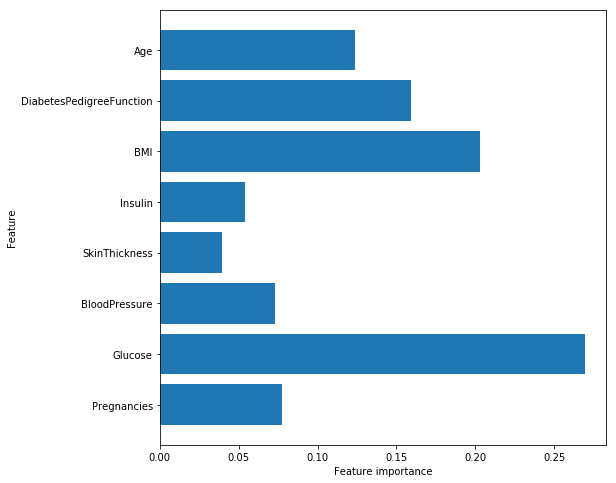

In [35]:
classifier2.feature_importances_
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(classifier2)

In [46]:
pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[76 19]
 [24 35]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        95
           1       0.65      0.59      0.62        59

   micro avg       0.72      0.72      0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



## Random forest in code

`n_estimators` = $m$<br>
`max_features` = $p$

In [37]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Get accuracy of training data

In [38]:

forest.score(X_train, y_train)

0.8550488599348535

#### Get accuracy of test data

In [39]:
forest.score(X_test, y_test)

0.7662337662337663

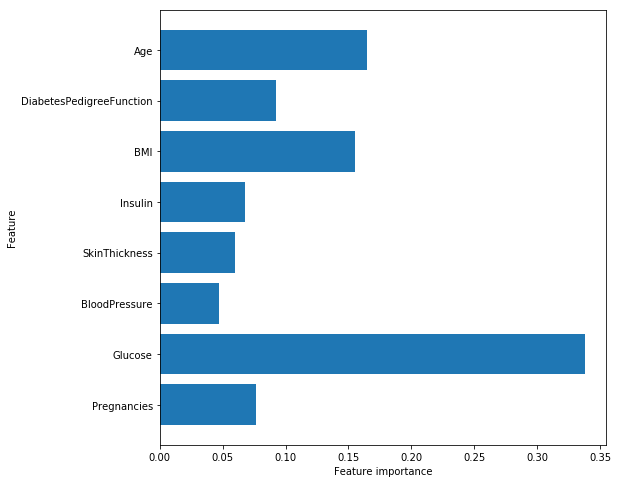

In [40]:
plot_feature_importances(forest)

### Let us try to fine tune this model a bit

In [41]:
forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
forest_2.score(X_train, y_train)

0.7687296416938111

In [43]:
forest_2.score(X_test, y_test)

0.7532467532467533

### Hyper-parameters for decision trees

`n_estimators` : the number of trees in the forest<br>
`criterion`: “gini”,”entropy” <br>
`max_features`: the number of random features to be considered when looking for the best split <br>
`max_depth`:  the maximum number of levels of a tree<br>
`bootstrap`: whether or not bootstrap samples are used to build trees <br>
`oob_score`: whether or not to use out-of-bag samples to estimate the generalization accuracy<br>
`n_jobs`: how many cores you want to use when training your trees<br>


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 100, 300],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

In [45]:
gs = GridSearchCV(forest, param_grid, cv=5)
gs.score(X_test, y_test)
gs.best_params_

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### Benefits
**Strong performance**: The Random Forest algorithm usually has very strong performance on most problems, when compared with other classification algorithms. Because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data, and generally tends to perform quite well.

**Interpretability**: Conveniently, since each tree in the Random Forest is a Glass-Box Model (meaning that the model is interpretable, allowing us to see how it arrived at a certain decision), the overall Random Forest is, as well! You'll demonstrate this yourself in the upcoming lab, by inspecting feature importances for both individual trees and the entire Random Forest itself.

### Drawbacks
**Computational Complexity**: Like any ensemble method, training multiple models means paying the computational cost of training each model. On large datasets, the runtime can be quite slow compared to other algorithms.

**Memory Usage**: Another side effect of the ensembled nature of this algorithm, having multiple models means storing each in memory. Random Forests tend to have a larger memory footprint that other models. Whereas a parametric model like a Logistic Regression just needs to store each of the coefficients, a Random Forest has to remember every aspect of every tree! It's not uncommon to see larger Random Forests that were trained on large datasets have memory footprints in the 10s, or even hundreds of MB. For data scientists working on modern computers, this isn't typically a problem--however, there are special cases where the memory footprint can make this an untenable choice--for instance, an app on a smartphone that uses machine learning may not be able to afford to spend that much disk space on a Random Forest model!

### Questions to consider

How do Random Forests handle the bias-variance tradeoff? <br>
What would be another way of using ensembling methods to tackle the bias-variance tradeoff?

Additional Resources<br>
https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf<br>
https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm


Another flatiron slidedeck [here](https://docs.google.com/presentation/d/1bUwvdvg4bDRVzE3YaLSQZcsx-7t2ZFnaEGxjQHjxAoc/edit?usp=sharing)